# Exploratory Data Analysis of Heart Disease Datasets
In this notebook, we will explore the **heart disease datasets** selected by the group<sup>1</sup> as part of Assignment \#5 for Data 1205 (Data Visualization) module.
The goal is to create a **`Discovery` Data Narative** for a particular dataset(s). The group will find the dataset, cleanse and manupilate the data, and create compelling visualizations. All of these steps will be presented to the lecturer through a recorded video presentation.

<br></br><sup>1</sup>*Group members*: **_Joseph Kimani, Gantavya Banga, Raj Dholakia_**

# Table of Contents
* [1. The Datasets](#dataset-information)
* [2. Loading Data](#loading-data)
* [3. Modifying the WHO dataset](#modifying-who-data)
* [4. Training and Evaluating the Models](#training-model)

<a id="dataset-information"></a>
## 1. The Datasets
**Heart Disease datasets** used for this assignment are:
1. `WHO` ([World Health Organization](https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-leading-causes-of-death)): The dataset consists the global health estimates with focus on the leading causes of death. The dataset spans from 2000-2019 and is segragated into all WHO member nations.
2. `NVSS` ([National Vital Statistics System](https://data.world/us-hhs-gov/52a72720-5ce6-45e1-a7a3-26dff759fc4b)): The dataset contains heart disease mortality rates in the US between `2015` and `2017`. The data has beeen processed in the following ways:
    - 3-year average.
    - Rates are age-standardized.
    - County rates are spatially smoothed.
    - The data can be viewed by gender and race/ethnicity.
    - Additional data, maps, and methodology can be viewed on the [Interactive Atlas of Heart Disease and Stroke](http://www.cdc.gov/dhdsp/maps/atlas)
    <br></br>_Source: Data World._
3. UCI ([UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)): A description from the website is as follows: _"This database contains **76 attributes**, but all published experiments refer to **using a subset of 14 of them**. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)."_

<a id="loading-data"></a>
## 2. Loading Data

In [48]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pathlib
import os
import datetime

# This module provides a progress bar when dealing with loops.
from tqdm import tqdm

In [2]:
# Defining the directory that contains all datasets
data_dir = pathlib.Path("Data")

# Check if directory exists
if not data_dir.exists():
    raise FileNotFoundError(f"No data directory named {data_dir} found.")

# Defining datasets
datasets = {
    "WHO": data_dir / "GHE2019_Deaths-2019-country.xlsx",
    "NVSS": data_dir / "Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2016-2018.csv",
    "UCI": data_dir / "Heart_Disease_Prediction.csv"
}

# Check if all the datasets exist
for dataset_name, path in datasets.items():
    if not path.exists():
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")
    else:
        print(f"{dataset_name} Dataset Found.")

WHO Dataset Found.
NVSS Dataset Found.
UCI Dataset Found.


In [3]:
# Create dataframes
dataset_dfs = {"WHO": pd.DataFrame(),
               "NVSS": pd.DataFrame(),
               "UCI": pd.DataFrame()}

for dataset_name, dataset in dataset_dfs.items():
    if datasets[dataset_name].exists():
        if datasets[dataset_name].suffix == '.csv':
            dataset_dfs[dataset_name] = pd.read_csv(datasets[dataset_name])
            print(f"{dataset_name} Dataset Loaded.")
        elif datasets[dataset_name].suffix == '.xlsx':
            dataset_dfs[dataset_name] = pd.read_excel(datasets[dataset_name])
            print(f"{dataset_name} Dataset Loaded.")

    else:
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")


WHO Dataset Loaded.
NVSS Dataset Loaded.
UCI Dataset Loaded.


> Viewing the top 5 rows for each dataset.

In [5]:
dataset_dfs["NVSS"].head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Y_lat,X_lon
0,2017,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,55.442393,-161.959930
1,2017,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,172.2,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,53.648343,-166.917533
2,2017,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,243.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,61.159145,-149.104559
3,2017,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,337.1,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,60.923648,-159.753262
4,2017,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,58.753496,-156.694662


In [6]:
dataset_dfs["UCI"].head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
dataset_dfs['WHO'].head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,GLOBAL HEALTH ESTIMATES 2019 SUMMARY TABLES\nD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.who.int/data/gho/data/themes/morta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="modifying-who-data"></a>
## Modifying the WHO dataset
The dataset obtained from WHO is formatted in a way that **cannot** be easily converted to a Pandas DataFrame. It requires some data cleansing in the excel document and then involves some data manupilation to obtained a DataFrame that can be analysed.

The following is what the Excel sheet looks like:
![Orginal Excel Shee](Images/screenshot_original_sheet.png)

In Excel, the following steps were carried out:
1. A new sheet is created, called `Summary Sheet`.
2. Data with its headers is copied from `All Deaths` sheet.
3. The data is pasted and the coutnry labels removed.
4. Any other row(s) or column(s) which are not needed are removed, like the `GHE code` column.
5. Add `0` for `population` and `All Causes` rows under `GHE cause`. This is to ensure missing values can be filled easily.
6. The data is then loaded below.

What the final summary sheet looks like:
![Summary Sheet](Images/screenshot_summary_sheet.png)

In [8]:
# Loading summary sheet from the excel document
who_dataset = pd.read_excel(datasets["WHO"], sheet_name="Summary Sheet")
who_dataset

,Sex,Unnamed: 1,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,I.,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,NaN,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,NaN,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Females,NaN,NaN,8.,Other unintentional injuries,NaN,1.23321,0.035055,0.47559,1.000655,...,1.839001,10.972379,0.394786,0.36418,0.008212,0.56181,1.878499,0.7981,0.641647,0.662551
611,Females,NaN,B.,Intentional injuries,NaN,NaN,14.064851,0.06776,0.563781,0.902505,...,1.723971,16.159785,0.209317,0.911984,0.013003,1.36611,2.460579,5.293909,0.530183,1.083053
612,Females,NaN,NaN,1.,Self-harm,NaN,0.667653,0.037885,0.390353,0.369492,...,0.566437,12.412987,0.159085,0.794494,0.011294,0.099759,2.249085,0.672016,0.240562,0.673381
613,Females,NaN,NaN,2.,Interpersonal violence,NaN,0.62116,0.029722,0.166617,0.525239,...,1.146993,3.679265,0.050048,0.11563,0.001694,1.264646,0.206339,0.749774,0.28747,0.402379


In [9]:
# Fill missing values and 
# Update column values into numercial categorical values
# 1. Communicable Diseases
# 2. Noncommunicable Diseases
# 3. Injuries
who_dataset.insert(loc=2,
                   column="Main Category",
                   value=who_dataset["Unnamed: 1"].fillna(method="ffill").replace({"I.": 1,
                                                                                   "II.": 2,
                                                                                   "III.": 3}))
who_dataset.drop("Unnamed: 1", axis=1, inplace=True)

In [10]:
who_dataset

,Sex,Main Category,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,1,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,1,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,1,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Females,3,NaN,8.,Other unintentional injuries,NaN,1.23321,0.035055,0.47559,1.000655,...,1.839001,10.972379,0.394786,0.36418,0.008212,0.56181,1.878499,0.7981,0.641647,0.662551
611,Females,3,B.,Intentional injuries,NaN,NaN,14.064851,0.06776,0.563781,0.902505,...,1.723971,16.159785,0.209317,0.911984,0.013003,1.36611,2.460579,5.293909,0.530183,1.083053
612,Females,3,NaN,1.,Self-harm,NaN,0.667653,0.037885,0.390353,0.369492,...,0.566437,12.412987,0.159085,0.794494,0.011294,0.099759,2.249085,0.672016,0.240562,0.673381
613,Females,3,NaN,2.,Interpersonal violence,NaN,0.62116,0.029722,0.166617,0.525239,...,1.146993,3.679265,0.050048,0.11563,0.001694,1.264646,0.206339,0.749774,0.28747,0.402379


In [11]:
# Create a dataframe with category alphabet and names
key_value_pair = who_dataset[["Main Category", "GHE cause", "Unnamed: 3"]].dropna().drop_duplicates()

# Make the dataframe with the right index values
sub_category_df = pd.DataFrame()
sub_category_df["Main Category"] = key_value_pair["Main Category"]
sub_category_df["Sub-category 1"] = key_value_pair["GHE cause"]
sub_category_df["Name"] = key_value_pair["Unnamed: 3"]
sub_category_df.set_index(["Main Category", "Sub-category 1"], inplace=True)

# View the dataframe created
sub_category_df

Name
Main Category Sub-category 1                                    
1             A.               Infectious and parasitic diseases
              B.                         Respiratory Infectious 
              C.                             Maternal conditions
              D.                             Neonatal conditions
              E.                        Nutritional deficiencies
2             A.                             Malignant neoplasms
              B.                                 Other neoplasms
              C.                               Diabetes mellitus
              D.              Endocrine, blood, immune disorders
              E.              Mental and substance use disorders
              F.                         Neurological conditions
              G.                            Sense organ diseases
              H.                         Cardiovascular diseases
              I.                            Respiratory diseases
              J.                              Digestive diseases
              K.                          Genitourinary diseases
              L.                                   Skin diseases
              M.                        Musculoskeletal diseases
              N.                            Congenital anomalies
              O.                                 Oral conditions
              P.                    Sudden infant death syndrome
3             A.                          Unintentional injuries
              B.                            Intentional injuries

In [14]:
# Creating a trimmed version of the dataset
who_dataset_trimmed = who_dataset.loc[who_dataset["GHE cause"].dropna().index].\
    drop(["Unnamed: 3", "Unnamed: 4", "Member State\n(See Notes for explanation of colour codes)"], axis=1).copy()

# Set index according to the categorical values
who_dataset_trimmed.set_index(["Sex", "Main Category", "GHE cause"], inplace=True)

In [15]:
who_dataset_trimmed

Afghanistan  \
Sex     Main Category GHE cause                                                        
Persons 0             Population ('000) (2)                                    38042   
                      All Causes                                           254.80991   
        1             Communicable, maternal, perinatal and nutrition...   83.910054   
                      A.                                                   28.908938   
                      B.                                                   14.659211   
...                                                                              ...   
Females 2             O.                                                           .   
                      P.                                                    0.195891   
        3             Injuries                                             17.603264   
                      A.                                                    3.538413   
                      B.                                                   14.064851   

                                                                            Albania  \
Sex     Main Category GHE cause                                                       
Persons 0             Population ('000) (2)                                    2881   
                      All Causes                                          31.154185   
        1             Communicable, maternal, perinatal and nutrition...   0.941825   
                      A.                                                    0.12468   
                      B.                                                   0.645985   
...                                                                             ...   
Females 2             O.                                                          .   
                      P.                                                   0.000421   
        3             Injuries                                             0.290402   
                      A.                                                   0.222642   
                      B.                                                    0.06776   

                                                                             Algeria  \
Sex     Main Category GHE cause                                                        
Persons 0             Population ('000) (2)                                    43053   
                      All Causes                                          203.300382   
        1             Communicable, maternal, perinatal and nutrition...   26.397358   
                      A.                                                    5.431372   
                      B.                                                     7.29088   
...                                                                              ...   
Females 2             O.                                                           .   
                      P.                                                    0.090635   
        3             Injuries                                              5.010705   
                      A.                                                    4.446923   
                      B.                                                    0.563781   

                                                                              Angola  \
Sex     Main Category GHE cause                                                        
Persons 0             Population ('000) (2)                                    31825   
                      All Causes                                          228.819281   
        1             Communicable, maternal, perinatal and nutrition...  135.374688   
                      A.                                                   72.403294   
                      B.                                                   25.035302   
...                                

Some of the variables are a `.`. From the documentation provided by WHO along with their dataset, `.` is equal to a `0`. Hence, the variables will be updated and converted to `float` in the following cell.

In [20]:
# Convert `object values` to `float` values
who_dataset_modified1 = pd.DataFrame()

for column in who_dataset_trimmed.columns:
    who_dataset_modified1[column] = pd.to_numeric(who_dataset_trimmed[column].replace({'.': 0}),
                                                  downcast="float",
                                                  errors="coerce")

# A transposed version of the dataframe will be used for further analysis.
who_dataset_modified1.T

Sex                                              Persons              \
Main Category                                          0               
GHE cause                          Population ('000) (2)  All Causes   
Afghanistan                                      38042.0  254.809906   
Albania                                           2881.0   31.154184   
Algeria                                          43053.0  203.300385   
Angola                                           31825.0  228.819275   
Antigua and Barbuda                                 97.0    0.651185   
...                                                  ...         ...   
Venezuela (Bolivarian Republic of)               28516.0  172.089951   
Viet Nam                                         96462.0  727.941162   
Yemen                                            29162.0  170.039093   
Zambia                                           17861.0  121.104858   
Zimbabwe                                         14645.0  117.709801   

Sex                                                                                              \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Afghanistan                                                                 83.910057             
Albania                                                                      0.941825             
Algeria                                                                     26.397358             
Angola                                                                     135.374695             
Antigua and Barbuda                                                          0.064040             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          26.780209             
Viet Nam                                                                    67.734497             
Yemen                                                                       51.259296             
Zambia                                                                      68.445869             
Zimbabwe                                                                    56.085545             

Sex                                                                            \
Main Category                                                                   
GHE cause                                  A.         B.        C.         D.   
Afghanistan                         28.908937  14.659210  7.806885  31.919039   
Albania                              0.124680   0.645985  0.001975   0.164791   
Algeria                              5.431373   7.290880  0.916694  12.656338   
Angola                              72.403290  25.035301  3.267900  31.044147   
Antigua and Barbuda                  0.030165   0.023675  0.000433   0.003271   
...                                       ...        ...       ...        ...   
Venezuela (Bolivarian Republic of)  12.649732   7.190808  0.422176   5.742914   
Viet Nam                            26.273970  27.870731  0.773028  11.494572   
Yemen                               16.132111  11.983312  0.889804  21.121099   
Zambia                              42.295750   9.589533  1.187941  13.001028   
Zimbabwe                            31.549055  10.847826  1.749061   9.516352   

Sex                                                                    \
Main Category                                                       2   
GHE cause                                 E. Noncommunicable diseases   
Afghanistan                         0.615982               126.847137   
Albania                             0.004394                29.266520   
Algeria                             0.102073               161.330139   
Angola                         

In [36]:
# Creating a transposed dataframe
who_dataset_modified2 = pd.DataFrame()
who_dataset_modified2 = who_dataset_modified1.T
who_dataset_modified2["Country"] = who_dataset_modified1.T.index
who_dataset_modified2.set_index("Country", inplace=True)
who_dataset_modified2

Sex                                              Persons              \
Main Category                                          0               
GHE cause                          Population ('000) (2)  All Causes   
Country                                                                
Afghanistan                                      38042.0  254.809906   
Albania                                           2881.0   31.154184   
Algeria                                          43053.0  203.300385   
Angola                                           31825.0  228.819275   
Antigua and Barbuda                                 97.0    0.651185   
...                                                  ...         ...   
Venezuela (Bolivarian Republic of)               28516.0  172.089951   
Viet Nam                                         96462.0  727.941162   
Yemen                                            29162.0  170.039093   
Zambia                                           17861.0  121.104858   
Zimbabwe                                         14645.0  117.709801   

Sex                                                                                              \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Country                                                                                           
Afghanistan                                                                 83.910057             
Albania                                                                      0.941825             
Algeria                                                                     26.397358             
Angola                                                                     135.374695             
Antigua and Barbuda                                                          0.064040             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          26.780209             
Viet Nam                                                                    67.734497             
Yemen                                                                       51.259296             
Zambia                                                                      68.445869             
Zimbabwe                                                                    56.085545             

Sex                                                                            \
Main Category                                                                   
GHE cause                                  A.         B.        C.         D.   
Country                                                                         
Afghanistan                         28.908937  14.659210  7.806885  31.919039   
Albania                              0.124680   0.645985  0.001975   0.164791   
Algeria                              5.431373   7.290880  0.916694  12.656338   
Angola                              72.403290  25.035301  3.267900  31.044147   
Antigua and Barbuda                  0.030165   0.023675  0.000433   0.003271   
...                                       ...        ...       ...        ...   
Venezuela (Bolivarian Republic of)  12.649732   7.190808  0.422176   5.742914   
Viet Nam                            26.273970  27.870731  0.773028  11.494572   
Yemen                               16.132111  11.983312  0.889804  21.121099   
Zambia                              42.295750   9.589533  1.187941  13.001028   
Zimbabwe                            31.549055  10.847826  1.749061   9.516352   

Sex                                                                    \
Main Category                                                       2   
GHE cause                                 E. Noncommunicable diseases  

In [37]:
# Understand the dataframe
who_dataset_modified2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 84 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   (Persons, 0, Population ('000) (2))                                         183 non-null    float32
 1   (Persons, 0, All Causes)                                                    183 non-null    float32
 2   (Persons, 1, Communicable, maternal, perinatal and nutritional conditions)  183 non-null    float32
 3   (Persons, 1, A.)                                                            183 non-null    float32
 4   (Persons, 1, B.)                                                            183 non-null    float32
 5   (Persons, 1, C.)                                                            183 non-null    float32
 6   (Persons, 1, D.)                        

In [50]:
who_dataset_modified3 = who_dataset_modified2[[
    ("Males", 1, "Communicable, maternal, perinatal and nutritional conditions"),
    ("Males", 2, "Noncommunicable diseases"),
    ("Males", 3, "Injuries"),
    ("Females", 1, "Communicable, maternal, perinatal and nutritional conditions"),
    ("Females", 2, "Noncommunicable diseases"),
    ("Females", 3, "Injuries")  
]].copy()

who_dataset_modified3["Total Deaths"] = who_dataset_modified2[("Persons", 0, "All Causes")]
who_dataset_modified3["Country"] = who_dataset_modified2.index
who_dataset_modified3.round(2)

Sex                                                                                       Males  \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Country                                                                                           
Afghanistan                                                                 40.310001             
Albania                                                                      0.470000             
Algeria                                                                     13.870000             
Angola                                                                      71.160004             
Antigua and Barbuda                                                          0.030000             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          14.230000             
Viet Nam                                                                    40.070000             
Yemen                                                                       27.690001             
Zambia                                                                      35.869999             
Zimbabwe                                                                    29.270000             

Sex                                                                     \
Main Category                                             2          3   
GHE cause                          Noncommunicable diseases   Injuries   
Country                                                                  
Afghanistan                                       60.189999  26.450001   
Albania                                           13.630000   0.660000   
Algeria                                           83.750000  10.560000   
Angola                                            39.400002  13.970000   
Antigua and Barbuda                                0.280000   0.030000   
...                                                     ...        ...   
Venezuela (Bolivarian Republic of)                57.709999  29.010000   
Viet Nam                                         319.179993  45.639999   
Yemen                                             43.669998  22.820000   
Zambia                                            22.719999   7.390000   
Zimbabwe                                          20.459999  10.910000   

Sex                                                                                     Females  \
Main Category                                                                                 1   
GHE cause                          Communicable, maternal, perinatal and nutritional conditions   
Country                                                                                           
Afghanistan                                                                 43.599998             
Albania                                                                      0.470000             
Algeria                                                                     12.530000             
Angola                                                                      64.209999             
Antigua and Barbuda                                                          0.030000             
...                                                                               ...             
Venezuela (Bolivarian Republic of)                                          12.550000             
Viet Nam                                                                    27.670000             
Yemen                                                                       23.570000             
Zambia                                                                      32.570000             
Zimbabwe         

In [57]:
top20_df = who_dataset_modified3.sort_values(by="Total Deaths", ascending=False).iloc[:20]

fig = px.bar(
    x=top20_df.index,
    y=[
        top20_df[("Males", 1, "Communicable, maternal, perinatal and nutritional conditions")],
        top20_df[("Males", 2, "Noncommunicable diseases")],
        top20_df[("Males", 3, "Injuries")],
        top20_df[("Females", 1, "Communicable, maternal, perinatal and nutritional conditions")],
        top20_df[("Females", 2, "Noncommunicable diseases")],
        top20_df[("Females", 3, "Injuries")]
    ],
    title="Wide-Form Input")

fig.update_layout(
    title="Breakdown of Deaths for WHO Member countries (2000-2020)",
    xaxis_title="WHO Member Country",
    yaxis_title="Number of Deaths (in 1000s)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
    legend_title="Legend Title",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    legend_title_font_color="green"
)
fig.update_xaxes(
    title_font_family="Arial",
    
)


fig.show()

In [58]:
all_deaths_per_capita = (who_dataset_modified1.T["Persons"][0].drop("Population ('000) (2)", axis=1).T.sum() / who_dataset_modified1.T["Persons"][0]["Population ('000) (2)"]) * 100
all_deaths_per_capita.sort_values(ascending=False)

Lesotho                 1.681087
Latvia                  1.561768
Lithuania               1.521360
Bulgaria                1.516902
Ukraine                 1.350924
                          ...   
Bahrain                 0.281700
Maldives                0.250118
United Arab Emirates    0.214230
Kuwait                  0.195873
Qatar                   0.160180
Length: 183, dtype: float32

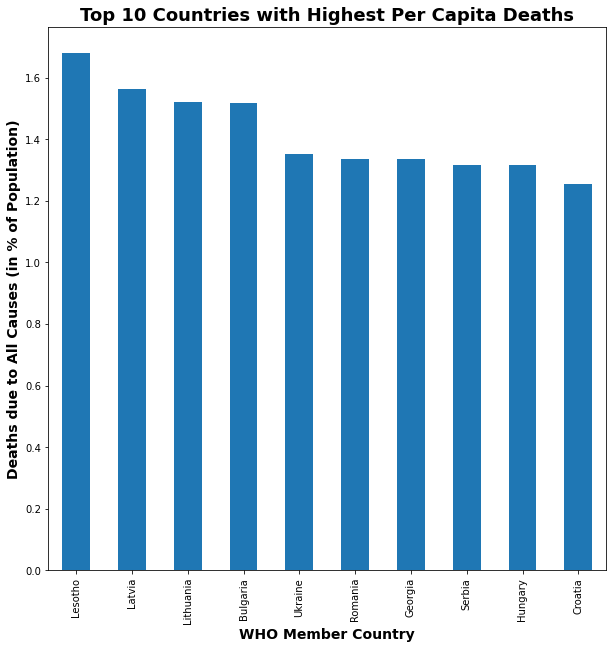

In [59]:
ax = all_deaths_per_capita.sort_values(ascending=False).iloc[:10].\
    plot(kind='bar',
         figsize=(10,10))

ax.set_ylabel("Deaths due to All Causes (in % of Population)",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("WHO Member Country",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_title("Top 10 Countries with Highest Per Capita Deaths",
             fontdict={"size": 18,
                        "weight": "bold"});

In [268]:
df = pd.concat([sub_category_df, who_dataset_modified1.T["Persons"][[1,2,3]].\
                    drop([(1, "Communicable, maternal, perinatal and nutritional conditions"),
                          (2, "Noncommunicable diseases"),
                          (3, "Injuries")], axis=1).sum()],
               axis=1)

deaths_by_subcategory = pd.DataFrame()
deaths_by_subcategory["Cause"] = df["Name"]
deaths_by_subcategory["Deaths"] = df[0]


df = None
deaths_by_subcategory

Cause        Deaths
Main Category                                                     
1             A.   Infectious and parasitic diseases   5101.199707
              B.             Respiratory Infectious    2603.912842
              C.                 Maternal conditions    196.007507
              D.                 Neonatal conditions   2037.549072
              E.            Nutritional deficiencies    262.737122
2             A.                 Malignant neoplasms   9296.640625
              B.                     Other neoplasms    138.472015
              C.                   Diabetes mellitus   1496.094238
              D.  Endocrine, blood, immune disorders    316.274231
              E.  Mental and substance use disorders    347.477173
              F.             Neurological conditions   2299.307617
              G.                Sense organ diseases      0.739300
              H.             Cardiovascular diseases  17863.828125
              I.                Respiratory diseases   4136.898438
              J.                  Digestive diseases   2454.999756
              K.              Genitourinary diseases   1641.798706
              L.                       Skin diseases     96.580887
              M.            Musculoskeletal diseases    151.344879
              N.                Congenital anomalies    532.854248
              O.                     Oral conditions      1.236247
              P.        Sudden infant death syndrome     30.205030
3             A.              Unintentional injuries   3159.246582
              B.                Intentional injuries   1250.368164

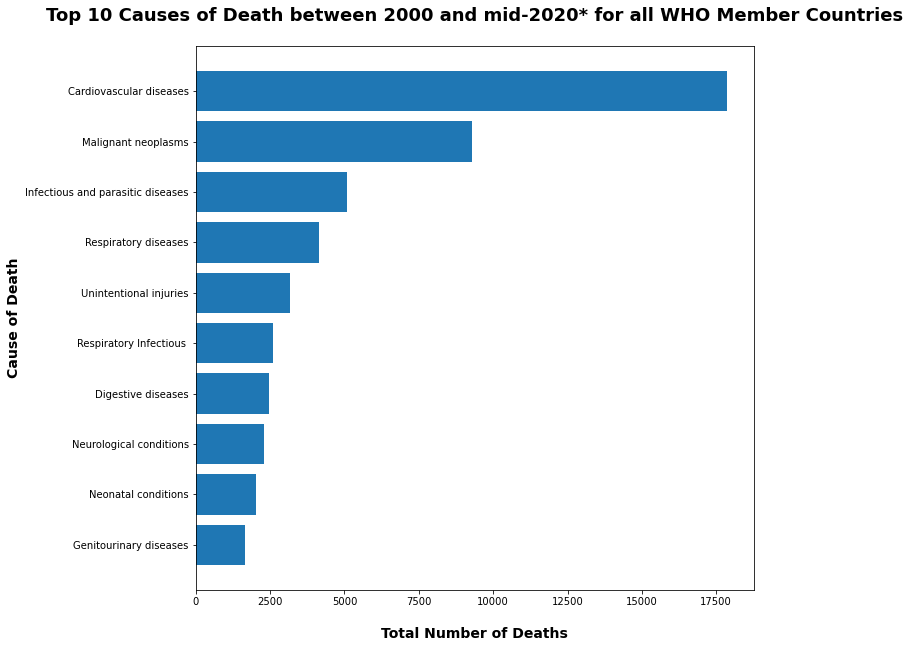

In [293]:
top10_causes = deaths_by_subcategory.sort_values(by="Deaths", ascending=False).iloc[:10]
x = top10_causes["Cause"]
y = top10_causes["Deaths"]

fig, ax = plt.subplots(figsize=(10,10))

ax.barh(y=x, width=y)
plt.gca().invert_yaxis()

ax.set_ylabel("Cause of Death",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("Total Number of Deaths (in 1000s)",
              fontdict={"size": 14,
                        "weight": "bold"},
              labelpad=20)

ax.set_title("Top 10 Causes of Death between 2000 and mid-2020* for all WHO Member Countries",
             fontdict={"size": 18,
                        "weight": "bold"},
             pad=25);

In [331]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(x=who_dataset_modified1.T[("Persons", 0, "Population ('000) (2)")],
                 y=who_dataset_modified1.T[("Persons", 0, "All Causes")],
                 color=noncom_deaths_per_capita, size=who_dataset_modified1.T[("Persons", 2, "H.")],
                 log_x=True, size_max=60, hover_data={"Country": who_dataset_modified1.T.index,
                                                      "Population": (who_dataset_modified1.T[("Persons", 0, "Population ('000) (2)")]*1000).round(2),
                                                      "Number of Deaths": (who_dataset_modified1.T[("Persons", 0, "All Causes")]*1000).round(2),
                                                      "Deaths due to Noncommunicable Diseases (per Capita)": noncom_deaths_per_capita.round(5),
                                                      "Deaths due to Cardiovascular Diseases": (who_dataset_modified1.T[("Persons", 2, "H.")]).round(2)})
    
fig.update_layout(
    title="Comparing the Number of Deaths and Population for WHO Member countries (2000-2020)",
    xaxis_title="Population",
    yaxis_title="Total Number of Deaths",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    legend_title="Legend Title",
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")

fig.show()

In [228]:
noncom_deaths_per_capita = who_dataset_modified1.T["Persons"][2].drop("Noncommunicable diseases", axis=1).T.sum() / who_dataset_modified1.T["Persons"][0]["Population ('000) (2)"]
noncom_deaths_per_capita

Afghanistan                           0.003334
Albania                               0.010158
Algeria                               0.003747
Angola                                0.002283
Antigua and Barbuda                   0.005692
                                        ...   
Venezuela (Bolivarian Republic of)    0.003926
Viet Nam                              0.006140
Yemen                                 0.002937
Zambia                                0.002359
Zimbabwe                              0.003155
Length: 183, dtype: float32

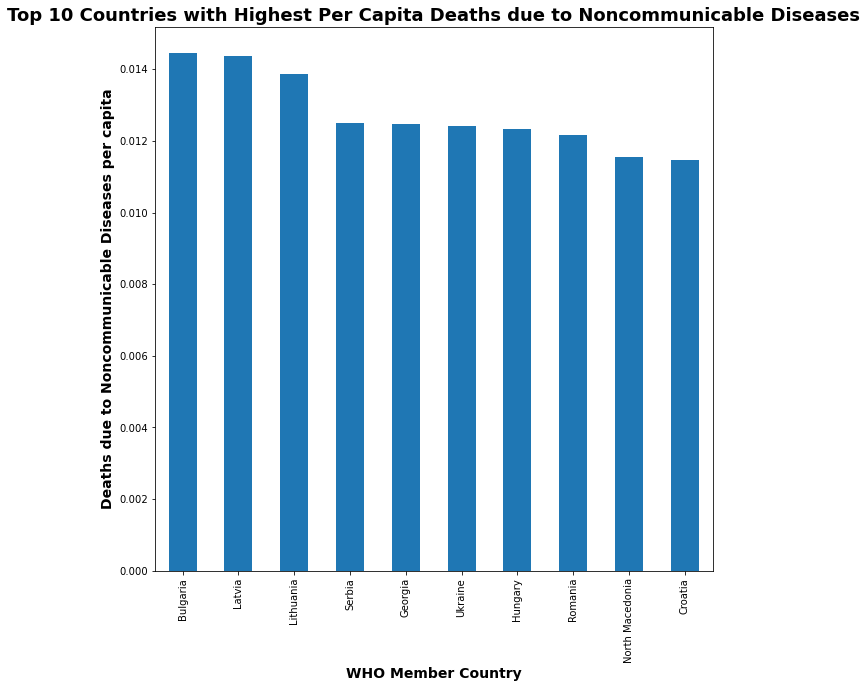

In [325]:
ax = noncom_deaths_per_capita.sort_values(ascending=False).iloc[:10].\
    plot(kind='bar',
         figsize=(10,10))

ax.set_ylabel("Deaths due to Noncommunicable Diseases per capita",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("WHO Member Country",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_title("Top 10 Countries with Highest Per Capita Deaths due to Noncommunicable Diseases",
             fontdict={"size": 18,
                        "weight": "bold"});

In [60]:
who_dataset.head()

,Sex,Main Category,GHE cause,Unnamed: 3,Unnamed: 4,Member State\n(See Notes for explanation of colour codes),Afghanistan,Albania,Algeria,Angola,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,Persons,0,Population ('000) (2),NaN,NaN,NaN,38042,2881,43053,31825,...,58005,329065,3462,32982,300,28516,96462,29162,17861,14645
1,Persons,0,All Causes,NaN,NaN,NaN,254.80991,31.154185,203.300382,228.819281,...,321.676117,2949.213916,34.80636,170.280825,2.133345,172.089954,727.941166,170.0391,121.104859,117.709802
2,Persons,1,"Communicable, maternal, perinatal and nutritio...",NaN,NaN,NaN,83.910054,0.941825,26.397358,135.374688,...,174.789115,156.369086,2.490147,13.977188,0.359619,26.780209,67.734497,51.259295,68.445866,56.085543
3,Persons,1,A.,Infectious and parasitic diseases,NaN,NaN,28.908938,0.12468,5.431372,72.403294,...,98.925744,73.441804,0.799736,3.737703,0.13464,12.649732,26.27397,16.132111,42.295751,31.549055
4,Persons,1,NaN,1.,Tuberculosis,NaN,9.839079,0.008428,2.840423,16.990719,...,20.269144,0.546351,0.080522,1.544185,0.016269,0.747564,9.445769,1.89943,5.941126,1.999064


In [61]:
who_dataset_modified1.head()

Afghanistan  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               38042.000000   
                      All Causes                                            254.809906   
        1             Communicable, maternal, perinatal and nutrition...     83.910057   
                      A.                                                     28.908937   
                      B.                                                     14.659210   

                                                                              Albania  \
Sex     Main Category GHE cause                                                         
Persons 0             Population ('000) (2)                               2881.000000   
                      All Causes                                            31.154184   
        1             Communicable, maternal, perinatal and nutrition...     0.941825   
                      A.                                                     0.124680   
                      B.                                                     0.645985   

                                                                               Algeria  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               43053.000000   
                      All Causes                                            203.300385   
        1             Communicable, maternal, perinatal and nutrition...     26.397358   
                      A.                                                      5.431373   
                      B.                                                      7.290880   

                                                                                Angola  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               31825.000000   
                      All Causes                                            228.819275   
        1             Communicable, maternal, perinatal and nutrition...    135.374695   
                      A.                                                     72.403290   
                      B.                                                     25.035301   

                                                                          Antigua and Barbuda  \
Sex     Main Category GHE cause                                                                 
Persons 0             Population ('000) (2)                                         97.000000   
                      All Causes                                                     0.651185   
        1             Communicable, maternal, perinatal and nutrition...             0.064040   
                      A.                                                             0.030165   
                      B.                                                             0.023675   

                                                                             Argentina  \
Sex     Main Category GHE cause                                                          
Persons 0             Population ('000) (2)                               44781.000000   
                      All Causes                                            348.916412   
        1             Communicable, maternal, perinatal and nutrition...     61.397060   
                      A.                                                     15.005384   
                      B.                                                     40.999798   

                                                                              Armenia  \
Sex     Main Category GHE cause                                                         
Persons 0             Population ('000) (2)                          

In [105]:
df1 = who_dataset.query("`Main Category` != 0")[["Main Category", "GHE cause", "Unnamed: 3", "Unnamed: 4", "Member State\n(See Notes for explanation of colour codes)"]]
df1["GHE cause"] = df1["GHE cause"].fillna(method='ffill')
df1.insert(loc=2,
           column="Sub-category 1",
           value=df1["Unnamed: 3"].fillna(method='ffill'))
df1.insert(loc=3,
           column="Sub-category 2",
           value=df1["Unnamed: 4"])
df1.insert(loc=4,
           column="Sub-category 3",
           value=df1["Member State\n(See Notes for explanation of colour codes)"])

df1.drop(["Unnamed: 3",
          "Unnamed: 4",
          "Member State\n(See Notes for explanation of colour codes)"],
         axis=1,
         inplace=True)

df1.set_index(["Main Category",
               "GHE cause",
               "Sub-category 1"], inplace=True)
# df1[df1["GHE cause"] == "H."]
df1

Sub-category 2  \
Main Category GHE cause                                          Sub-category 1                                                                  
1             Communicable, maternal, perinatal and nutrition... NaN                                                                       NaN   
              A.                                                 Infectious and parasitic diseases                                         NaN   
                                                                 1.                                                               Tuberculosis   
                                                                 2.                                                         STDs excluding HIV   
                                                                 2.                                                                         a.   
...                                                                                                                                        ...   
3             A.                                                 8.                                               Other unintentional injuries   
              B.                                                 Intentional injuries                                                      NaN   
                                                                 1.                                                                  Self-harm   
                                                                 2.                                                     Interpersonal violence   
                                                                 3.                                 Collective violence and legal intervention   

                                                                                                   Sub-category 3  
Main Category GHE cause                                          Sub-category 1                                    
1             Communicable, maternal, perinatal and nutrition... NaN                                          NaN  
              A.                                                 Infectious and parasitic diseases            NaN  
                                                                 1.                                           NaN  
                                                                 2.                                           NaN  
                                                                 2.                                      Syphilis  
...                                                                                                           ...  
3             A.                                                 8.                                           NaN  
              B.                                                 Intentional injuries                         NaN  
                                                                 1.                                           NaN  
                                                                 2.                                           NaN  
                                                                 3.                                           NaN  

[609 rows x 2 columns]

In [137]:
df2 = who_dataset.copy()
df2["GHE cause"] = df2["GHE cause"].fillna(method='ffill')
df2.insert(loc=3,
           column="Sub-category 1",
           value=df2["Unnamed: 3"].fillna(method='ffill'))
df2.insert(loc=4,
           column="Sub-category 2",
           value=df2["Unnamed: 4"])
df2.insert(loc=5,
           column="Sub-category 3",
           value=df2["Member State\n(See Notes for explanation of colour codes)"])

df2.drop(["Main Category",
          "Unnamed: 3",
          "Unnamed: 4",
          "Member State\n(See Notes for explanation of colour codes)"],
         axis=1,
         inplace=True)

df3 = df2[df2["GHE cause"] == "H."].drop("GHE cause", axis=1).fillna("").set_index(["Sex", "Sub-category 1", "Sub-category 2", "Sub-category 3"]).T
df3["Country"] = df3.index
df3.set_index("Country").to_excel((data_dir / "processed_GHE_dataset.xlsx"),
                               sheet_name="Cardiovascular Disease Breakdown")

/Users/raj/Documents/Canada/Durham/1205-Visualizations_Leadership_and_Business/Assignments/assignment_5/env/lib/python3.8/site-packages/openpyxl/workbook/child.py:99: UserWarning:

Title is more than 31 characters. Some applications may not be able to read the file



In [67]:
# Create a dataframe with category alphabet and names
key_value_pair2 = who_dataset[["Main Category", "GHE cause", "Unnamed: 3", "Unnamed: 4"]].loc

# Make the dataframe with the right index values
sub_category2_df = pd.DataFrame()
sub_category2_df["Main Category"] = key_value_pair2["Main Category"]
sub_category2_df["Sub-category 1"] = key_value_pair2["GHE cause"]
sub_category2_df["Sub-category 2"] = key_value_pair2["Unnamed: 3"]
sub_category2_df["Name"] = key_value_pair2["Unnamed: 4"]
sub_category2_df.set_index(["Main Category", "Sub-category 1", "Sub-category 2"], inplace=True)

# View the dataframe created
sub_category2_df

Name
Main Category Sub-category 1                                     Sub-category 2                                                               
0             Population ('000) (2)                              NaN                                                                       NaN
              All Causes                                         NaN                                                                       NaN
1             Communicable, maternal, perinatal and nutrition... NaN                                                                       NaN
              A.                                                 Infectious and parasitic diseases                                         NaN
              NaN                                                1.                                                               Tuberculosis
...                                                                                                                                        ...
3             NaN                                                8.                                               Other unintentional injuries
              B.                                                 Intentional injuries                                                      NaN
              NaN                                                1.                                                                  Self-harm
                                                                 2.                                                     Interpersonal violence
                                                                 3.                                 Collective violence and legal intervention

[615 rows x 1 columns]

In [133]:
who_dataset_modified3.head()

Sex                                                                        Males  \
Main Category                                                                  1   
GHE cause           Communicable, maternal, perinatal and nutritional conditions   
Country                                                                            
Afghanistan                                                  40.310074             
Albania                                                       0.467103             
Algeria                                                      13.871757             
Angola                                                       71.164291             
Antigua and Barbuda                                           0.034943             

Sex                                                      \
Main Category                              2          3   
GHE cause           Noncommunicable diseases   Injuries   
Country                                                   
Afghanistan                        60.188889  26.449455   
Albania                            13.628529   0.655438   
Algeria                            83.746147  10.562186   
Angola                             39.403198  13.965070   
Antigua and Barbuda                 0.275547   0.026448   

Sex                                                                      Females  \
Main Category                                                                  1   
GHE cause           Communicable, maternal, perinatal and nutritional conditions   
Country                                                                            
Afghanistan                                                  43.599979             
Albania                                                       0.474722             
Algeria                                                      12.525601             
Angola                                                       64.210396             
Antigua and Barbuda                                           0.029097             

Sex                                                     Total Deaths  \
Main Category                              2          3                
GHE cause           Noncommunicable diseases   Injuries                
Country                                                                
Afghanistan                        66.658249  17.603264   254.809906   
Albania                            15.637991   0.290402    31.154184   
Algeria                            77.583992   5.010705   203.300385   
Angola                             33.245644   6.830684   228.819275   
Antigua and Barbuda                 0.276612   0.008539     0.651185   

Sex                              Country  
Main Category                             
GHE cause                                 
Country                                   
Afghanistan                  Afghanistan  
Albania                          Albania  
Algeria                          Algeria  
Angola                            Angola  
Antigua and Barbuda  Antigua and Barbuda

In [141]:
# Save all the important dataframes to different sheets in an Excel Workbook

with pd.ExcelWriter((data_dir / "processed_GHE_dataset.xlsx")) as writer: 
    who_dataset_modified2.to_excel(writer,
                                   sheet_name="All Deaths sheet")
    df3.set_index("Country").to_excel(writer,
                                      sheet_name="Cardiovascular Breakdown")
    sub_category_df.to_excel(writer,
                             sheet_name="Sub-category 1 index")